# Question1

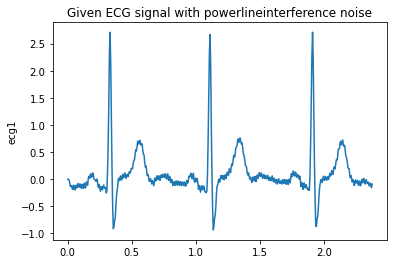

In [1]:
# Read data file
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift

Fs1 = 200.0       # sampling frequency 


x=np.loadtxt('ecg2x60.dat') #Data file given

ind = np.arange(x.size)
t=ind*(1/Fs1)
#plt.figure(1)
plt.plot(t,x)
plt.ylabel('ecg1')
plt.title('Given ECG signal with powerlineinterference noise')
plt.show()

## Part a

[0.32420137+0.94598809j 0.32420137-0.94598809j]


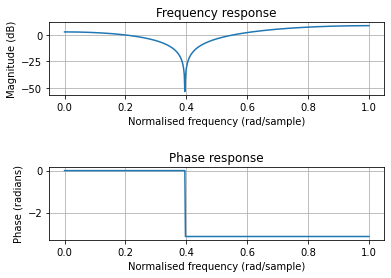

In [2]:
import scipy.signal as signal
from pylab import *

#Design of a notch filter
theta= (60/200)*(2*np.pi)*(180/3.14)

Z= complex(np.cos(theta), np.sin(theta))
Zc= complex(np.cos(theta),-np.sin(theta))

Zeros= np.array([Z,Zc])
Poles= [0]
w,h= signal.freqz_zpk(Zeros,Poles,1)
subplot(211)
h_dB= 20*np.log10(np.abs(h))
plot(w/max(w),h_dB)
xlabel('Normalised frequency (rad/sample)')
ylabel('Magnitude (dB)')
title('Frequency response')
plt.grid()

subplot(212)
h_Phase= unwrap(arctan2(imag(h),real(h)))
plot(w/max(w),h_Phase)
xlabel('Normalised frequency (rad/sample)')
ylabel('Phase (radians)')
title('Phase response')
plt.grid()
subplots_adjust(hspace=1.0)
print(Zeros)

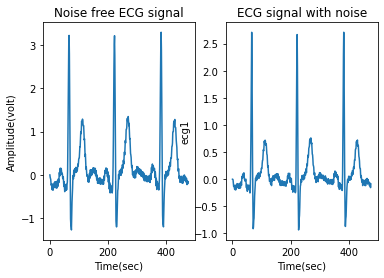

<Figure size 432x288 with 0 Axes>

In [3]:
import scipy.signal as signal

#Noisy ECG signal through Notch filter
N,D= signal.zpk2tf(Zeros,Poles,1)
y= signal.filtfilt(N,D,x)

subplot(121)
plt.xlabel('Time(sec)')
plt.ylabel('Amplitude(volt)')
plt.title('Noise free ECG signal')
plt.plot(y)

#comparision with original signal
subplot(122)
plt.plot(x)
plt.ylabel('ecg1')
plt.xlabel('Time(sec)')
plt.title('ECG signal with noise')
plt.show()
subplots_adjust(hspace=1.0)


## Part b

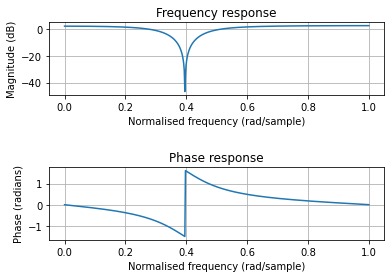

In [4]:
#Including poles in design of notch filter with radius r=0.99 and location same as zeros
r=0.7
Zeros= np.array([Z,Zc])
Poles= np.array([r*Z,r*Zc])
w,h= signal.freqz_zpk(Zeros,Poles,1)
subplot(211)
h_dB= 20*np.log10(np.abs(h))
plot(w/max(w),h_dB)
xlabel('Normalised frequency (rad/sample)')
ylabel('Magnitude (dB)')
title('Frequency response')
plt.grid()

subplot(212)
h_Phase= unwrap(arctan2(imag(h),real(h)))
plot(w/max(w),h_Phase)
xlabel('Normalised frequency (rad/sample)')
ylabel('Phase (radians)')
title('Phase response')
plt.grid()
subplots_adjust(hspace=1.0)

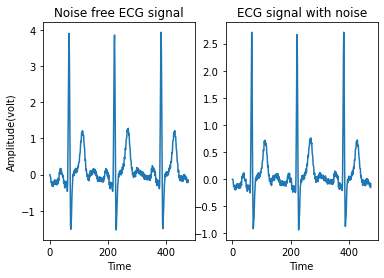

In [5]:
import scipy.signal as signal

#Noisy ECG signal through Notch filter
N,D= signal.zpk2tf(Zeros,Poles,1)
y= signal.filtfilt(N,D,x)

subplot(121)
plt.xlabel('Time')
plt.ylabel('Amplitude(volt)')
plt.title('Noise free ECG signal')
plt.plot(y)

#comparision with original signal
subplot(122)
plt.plot(x)
plt.xlabel('Time')
plt.title('ECG signal with noise')
plt.show()

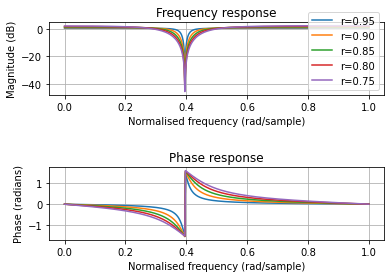

In [6]:
#varying radius r for poles and plotting the filter 
r=0.95
Zeros= np.array([Z,Zc])
Poles= np.array([r*Z,r*Zc])
w,h= signal.freqz_zpk(Zeros,Poles,1)
subplot(211)
h_dB= 20*np.log10(np.abs(h))
plot(w/max(w),h_dB,label="r=0.95")
subplot(212)
h_Phase= unwrap(arctan2(imag(h),real(h)))
plot(w/max(w),h_Phase)


r=0.90
Zeros= np.array([Z,Zc])
Poles= np.array([r*Z,r*Zc])
w,h= signal.freqz_zpk(Zeros,Poles,1)
subplot(211)
h_dB= 20*np.log10(np.abs(h))
plot(w/max(w),h_dB,label="r=0.90")
subplot(212)
h_Phase= unwrap(arctan2(imag(h),real(h)))
plot(w/max(w),h_Phase)


r=0.85
Zeros= np.array([Z,Zc])
Poles= np.array([r*Z,r*Zc])
w,h= signal.freqz_zpk(Zeros,Poles,1)
subplot(211)
h_dB= 20*np.log10(np.abs(h))
plot(w/max(w),h_dB,label="r=0.85")
subplot(212)
h_Phase= unwrap(arctan2(imag(h),real(h)))
plot(w/max(w),h_Phase)


r=0.80
Zeros= np.array([Z,Zc])
Poles= np.array([r*Z,r*Zc])
w,h= signal.freqz_zpk(Zeros,Poles,1)
subplot(211)
h_dB= 20*np.log10(np.abs(h))
plot(w/max(w),h_dB,label="r=0.80")
subplot(212)
h_Phase= unwrap(arctan2(imag(h),real(h)))
plot(w/max(w),h_Phase)


r=0.75
Zeros= np.array([Z,Zc])
Poles= np.array([r*Z,r*Zc])
w,h= signal.freqz_zpk(Zeros,Poles,1)
subplot(211)
h_dB= 20*np.log10(np.abs(h))
plot(w/max(w),h_dB,label="r=0.75")
xlabel('Normalised frequency (rad/sample)')
ylabel('Magnitude (dB)')
title('Frequency response')
plt.grid()
plt.legend(loc='lower right')
subplot(212)
h_Phase= unwrap(arctan2(imag(h),real(h)))
plot(w/max(w),h_Phase)
xlabel('Normalised frequency (rad/sample)')
ylabel('Phase (radians)')
title('Phase response')
plt.grid()
subplots_adjust(hspace=1.0)


# Question2

(8568,)


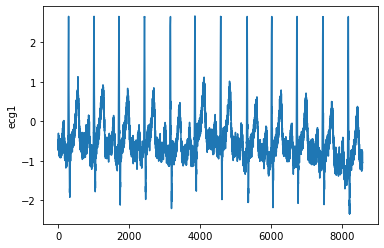

In [7]:
#Reading hfn data file
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift

Fs1 = 1000.0       # sampling frequency 


x=np.loadtxt('ecg_hfn.dat',delimiter=',')

ind = np.arange(x.size)
t=ind*(1/Fs1)
#plt.figure(1)
plt.plot(x)
plt.ylabel('ecg1')
print(x.shape)

In [8]:
#To detect peaks and complete cardiac cycle
#To detect the appropriate template of cardiac cycle
z=[]
for t in range(8568):
    if x[t]>2.5:
        z.append(t)
print(z)

[290, 291, 292, 293, 294, 295, 296, 297, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1709, 1710, 1711, 1712, 1713, 1714, 1715, 2425, 2426, 2427, 2428, 2429, 2430, 2431, 2432, 2433, 3157, 3158, 3159, 3160, 3161, 3847, 3848, 3849, 3850, 3851, 3852, 3853, 3854, 3855, 4568, 4569, 4570, 4571, 4572, 4573, 4574, 4575, 4576, 4577, 4578, 5316, 5317, 5318, 5319, 5320, 5321, 6009, 6010, 6011, 6012, 6013, 6014, 6716, 6719, 6720, 6721, 6722, 6723, 6724, 6725, 7449, 7450, 7451, 7452, 7453, 7454, 8164, 8165, 8166, 8167, 8168]


Text(0.5, 1.0, 'Noisy cardiac cycle(QRS peak)')

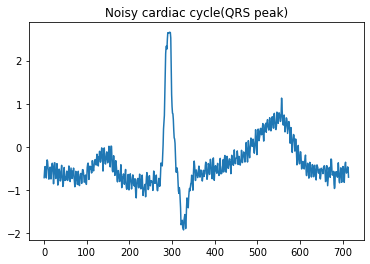

In [9]:
#complete noisy cardiac cycle
template =x[0:715]
plot(template)
title("Noisy cardiac cycle(QRS peak)")

## part a

Text(0.5, 1.0, 'Crosscorrelation of template with ECG noise signal')

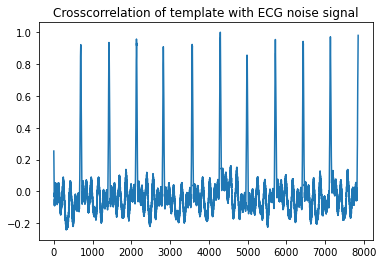

In [10]:
# Normalise the signals using the z-score normalisation.
signal_1=template
m_signal_1 = signal_1 - np.mean(signal_1); 
w_signal_1 = m_signal_1 / np.std(m_signal_1)
# Calculate the full cross-correlation between the two signals.
T=715
signal_2=x
m_signal_2 = signal_2 - np.mean(signal_2); 
w_signal_2 = m_signal_2 / np.std(m_signal_2)
corr = np.correlate(w_signal_1,w_signal_2)
corr=corr/max(corr)

plot(corr)
title("Crosscorrelation of template with ECG noise signal")


In [11]:
threshold=0.953 #high threshold
beats=0
for i in range(len(corr)):
    if corr[i]>=threshold:
        beats=beats+1
print("No of beats ",beats)

No of beats  12


In [12]:
threshold=0.3 #high threshold
beats=0
for i in range(len(corr)):
    if corr[i]>=threshold:
        beats=beats+1
print("No of beats ",beats)

No of beats  406


##### we observe as threshold increases no of beats detected are less 

## part b

Text(0.5, 1.0, 'synchronized averging signal of one cardiac cycle')

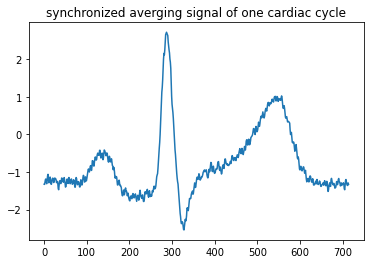

In [13]:
#implementation of synchronized averaging filter
T=715
sa=x[0:T]
for l in range(10):
    sa=sa+x[(l+1)*T:(l+2)*T]
sa=sa/6
plot(sa)
title("synchronized averging signal of one cardiac cycle")

## part c

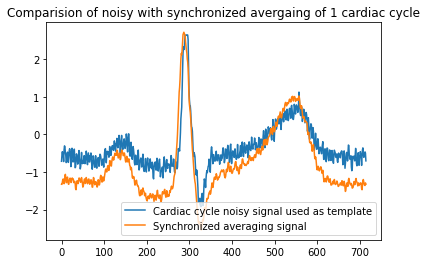

In [14]:
plt.plot(template,label="Cardiac cycle noisy signal used as template")
plt.plot(sa,label="Synchronized averaging signal")
title("Comparision of noisy with synchronized avergaing of 1 cardiac cycle")
plt.legend(loc="lower right")

# Question 3

Text(0, 0.5, 'ecg1')

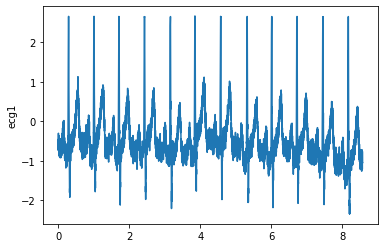

In [15]:
#importing data
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift

Fs1 = 1000.0       # sampling frequency 


x=np.loadtxt('ecg_hfn.dat',delimiter=',')

ind = np.arange(x.size)
t=ind*(1/Fs1)
#plt.figure(1)
plt.plot(t,x)
plt.ylabel('ecg1')

## part a

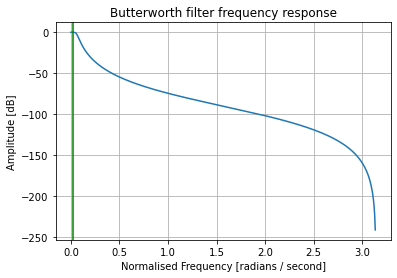

In [16]:
# Design of 3rd order butterworth low pass filter with cut off frequency 10Hz
N=3
cf=10
fs=1000
b,a = signal.butter(N, (cf/fs)*2, 'low')
w, h = signal.freqz(b,a)
plt.plot(w, 20*np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Normalised Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.grid()
plt.axvline((cf/fs)*2, color='green') # cutoff frequency
plt.show()

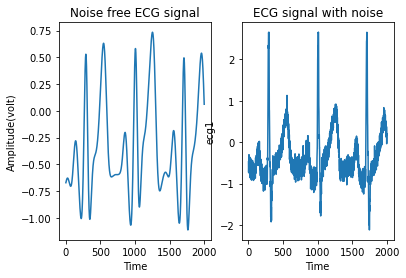

In [17]:
y = signal.filtfilt(b,a, x) #y is filtered output,x is noise ecg signal which is imported

#filtered signal using butterworthfilter
subplot(121)
plt.xlabel('Time')
plt.ylabel('Amplitude(volt)')
plt.title('Noise free ECG signal')
plt.plot(y[0:2000])

#comparision with original signal
subplot(122)
plt.plot(x[0:2000])
plt.ylabel('ecg1')
plt.xlabel('Time')
plt.title('ECG signal with noise')
plt.show()

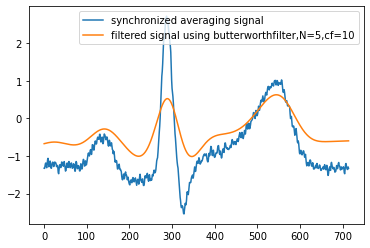

In [18]:
plt.plot(sa,label="synchronized averaging signal")
plt.plot(y[0:715],label="filtered signal using butterworthfilter,N=5,cf=10")
plt.legend()

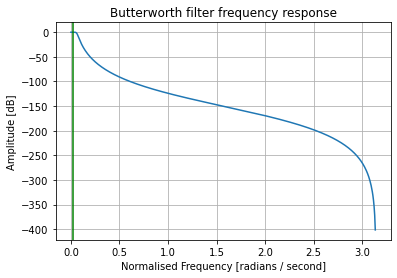

In [19]:
# Design of 5th order butterworth low pass filter with cut off frequency 10Hz
N=5
cf=10
fs=1000
b,a = signal.butter(N, (cf/fs)*2, 'low')
w, h = signal.freqz(b,a)
plt.plot(w, 20*np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Normalised Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.grid()
plt.axvline((cf/fs)*2, color='green') # cutoff frequency
plt.show()

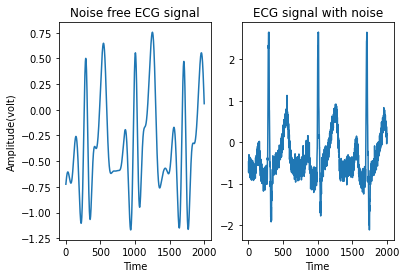

In [20]:
y = signal.filtfilt(b,a, x) #y is filtered output,x is noise ecg signal which is imported

#filtered signal using butterworthfilter
subplot(121)
plt.xlabel('Time')
plt.ylabel('Amplitude(volt)')
plt.title('Noise free ECG signal')
plt.plot(y[0:2000])

#comparision with original signal
subplot(122)
plt.plot(x[0:2000])
plt.xlabel('Time')
plt.title('ECG signal with noise')
plt.show()

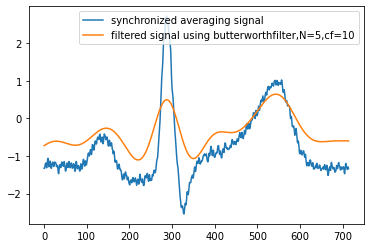

In [21]:
plt.plot(sa,label="synchronized averaging signal")
plt.plot(y[0:715],label="filtered signal using butterworthfilter,N=5,cf=10")
plt.legend()

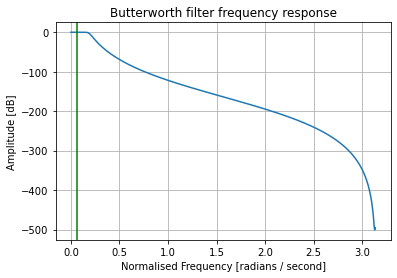

In [22]:
# Design of 8th order butterworth low pass filter with cut off frequency 30Hz
N=8
cf=30
fs=1000
b,a = signal.butter(N, (cf/fs)*2, 'low')
w, h = signal.freqz(b,a)
plt.plot(w, 20*np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Normalised Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.grid()
plt.axvline((cf/fs)*2, color='green') # cutoff frequency
plt.show()

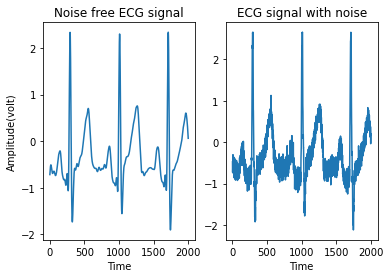

In [23]:
y = signal.filtfilt(b,a, x) #y is filtered output,x is noise ecg signal which is imported

#filtered signal using butterworthfilter
subplot(121)
plt.xlabel('Time')
plt.ylabel('Amplitude(volt)')
plt.title('Noise free ECG signal')
plt.plot(y[0:2000])

#comparision with original signal
subplot(122)
plt.plot(x[0:2000])
plt.xlabel('Time')
plt.title('ECG signal with noise')
plt.show()

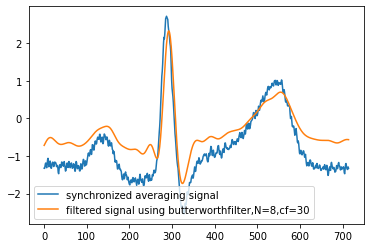

In [24]:
plt.plot(sa,label="synchronized averaging signal")
plt.plot(y[0:715],label="filtered signal using butterworthfilter,N=8,cf=30")
plt.legend()

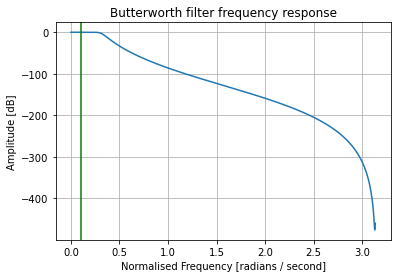

In [25]:
# Design of 8th order butterworth low pass filter with cut off frequency 50Hz
N=8
cf=50
fs=1000
b,a = signal.butter(N, (cf/fs)*2, 'low')
w, h = signal.freqz(b,a)
plt.plot(w, 20*np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Normalised Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.grid()
plt.axvline((cf/fs)*2, color='green') # cutoff frequency
plt.show()

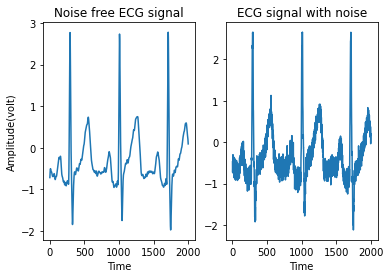

In [26]:
y = signal.filtfilt(b,a, x) #y is filtered output,x is noise ecg signal which is imported

#filtered signal using butterworthfilter
subplot(121)
plt.xlabel('Time')
plt.ylabel('Amplitude(volt)')
plt.title('Noise free ECG signal')
plt.plot(y[0:2000])

#comparision with original signal
subplot(122)
plt.plot(x[0:2000])
plt.xlabel('Time')
plt.title('ECG signal with noise')
plt.show()

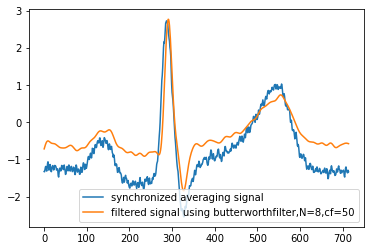

In [27]:
plt.plot(sa,label="synchronized averaging signal")
plt.plot(y[0:715],label="filtered signal using butterworthfilter,N=8,cf=50")
plt.legend(loc="lower right")

### Part b

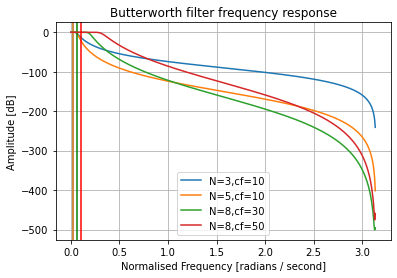

In [28]:
#comparision of same order different cutofffreq,different order same cutoff freq
N=3
cf=10
fs=1000
b,a = signal.butter(N, (cf/fs)*2, 'low')
w, h = signal.freqz(b,a)
plt.plot(w, 20*np.log10(abs(h)),label="N=3,cf=10")
plt.axvline((cf/fs)*2, color='blue') # cutoff frequency

N=5
cf=10
fs=1000
b,a = signal.butter(N, (cf/fs)*2, 'low')
w, h = signal.freqz(b,a)
plt.plot(w, 20*np.log10(abs(h)),label="N=5,cf=10")
plt.axvline((cf/fs)*2, color='orange') # cutoff frequency

N=8
cf=30
fs=1000
b,a = signal.butter(N, (cf/fs)*2, 'low')
w, h = signal.freqz(b,a)
plt.plot(w, 20*np.log10(abs(h)),label="N=8,cf=30")
plt.axvline((cf/fs)*2, color='green') # cutoff frequency

N=8
cf=50
fs=1000
b,a = signal.butter(N, (cf/fs)*2, 'low')
w, h = signal.freqz(b,a)
plt.plot(w, 20*np.log10(abs(h)),label="N=8,cf=50")
plt.axvline((cf/fs)*2, color='red') # cutoff frequency



plt.title('Butterworth filter frequency response')
plt.xlabel('Normalised Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.legend()
plt.grid()
plt.show()
